In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
import os
import glob

In [4]:
# Note: IMDB movie review dataset can be downloaded from http://ai.stanford.edu/~amaas/data/sentiment

In [5]:
#load data
train_path_pos = r'E:\AllPrograms\Datasets\aclImdb\train\pos'
train_path_neg = r'E:\AllPrograms\Datasets\aclImdb\train\neg' 
test_path_pos = r'E:\AllPrograms\Datasets\aclImdb\test\pos'
test_path_neg = r'E:\AllPrograms\Datasets\aclImdb\test\neg' 

In [6]:
def read_data(file_name):
    with open(file=file_name, mode='r', encoding='utf-8') as file_reader:
        return file_reader.read()

In [7]:
def get_reivews_and_labels(pos_path, neg_path):
    reviews = []
    labels = []
    pos_file_names = glob.glob(os.path.join(pos_path, '*.txt'))
    neg_file_names = glob.glob(os.path.join(neg_path, '*.txt'))
    for pos_file_name in pos_file_names:
        text = read_data(pos_file_name)
        reviews.append(text)
        labels.append(1)
    for neg_file_name in neg_file_names:
        text = read_data(neg_file_name)
        reviews.append(text)
        labels.append(0)
    return reviews, labels    

In [8]:
X_train, y_train = get_reivews_and_labels(train_path_pos, train_path_neg)
X_test, y_test = get_reivews_and_labels(test_path_pos, test_path_neg)

In [9]:
print(y_train[24000])

0


In [10]:
#define constants
VOCAB_SIZE = 25000
EMBEDDING_DIM = 16
MAX_LENGTH = 100
TRUNC_TYPE_POST = 'pre'
OOV_TOKEN = "<OOV>"

In [11]:
#instantiate tokenizer and tokenize
tokenizer = Tokenizer(num_words=VOCAB_SIZE)

In [12]:
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index 

In [13]:
#word_index

In [14]:
#convert train text to sequences and perform padding
train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded_sequences = pad_sequences(sequences=train_sequences, maxlen=MAX_LENGTH, truncating=TRUNC_TYPE_POST)

In [15]:
print(train_sequences[0])

[21905, 309, 6, 3, 1069, 209, 9, 2161, 30, 1, 169, 55, 14, 46, 82, 5844, 41, 392, 110, 138, 14, 5340, 58, 4449, 150, 8, 1, 4988, 5924, 482, 69, 5, 261, 12, 21905, 2002, 6, 73, 2425, 5, 632, 71, 6, 5340, 1, 5, 2003, 10307, 1, 5925, 1534, 34, 67, 64, 205, 140, 65, 1230, 20598, 1, 4, 1, 223, 901, 29, 3022, 69, 4, 1, 5845, 10, 693, 2, 65, 1534, 51, 10, 216, 1, 387, 8, 60, 3, 1467, 3712, 800, 5, 3513, 177, 1, 392, 10, 1237, 13886, 30, 309, 3, 353, 344, 2974, 143, 130, 5, 7799, 28, 4, 126, 5340, 1467, 2373, 5, 21905, 309, 10, 532, 12, 108, 1468, 4, 58, 555, 101, 12, 21905, 309, 6, 227, 4174, 48, 3, 2232, 12, 9, 215]


In [16]:
print(train_padded_sequences[0])

[21905  2002     6    73  2425     5   632    71     6  5340     1     5
  2003 10307     1  5925  1534    34    67    64   205   140    65  1230
 20598     1     4     1   223   901    29  3022    69     4     1  5845
    10   693     2    65  1534    51    10   216     1   387     8    60
     3  1467  3712   800     5  3513   177     1   392    10  1237 13886
    30   309     3   353   344  2974   143   130     5  7799    28     4
   126  5340  1467  2373     5 21905   309    10   532    12   108  1468
     4    58   555   101    12 21905   309     6   227  4174    48     3
  2232    12     9   215]


In [17]:
#convert test text to sequences and perform padding
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded_sequences = pad_sequences(sequences=test_sequences, maxlen=MAX_LENGTH, truncating=TRUNC_TYPE_POST)

In [18]:
# convert lables into numpy format
y_train = np.array(y_train)
y_test = np.array(y_test)

In [19]:
# create model
def get_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_LENGTH),
        tf.keras.layers.LSTM(64),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile( optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [20]:
#train the model
model = get_model()
trained_model = model.fit(x=train_padded_sequences,
          y=y_train,
          batch_size=32,
          epochs=50,
          validation_data=(test_padded_sequences, y_test),
          use_multiprocessing=True,
        )

Train on 25000 samples, validate on 25000 samples
Epoch 1/50
25000/25000 [==============================] - 56s 2ms/sample - loss: 0.4490 - accuracy: 0.7890 - val_loss: 0.3631 - val_accuracy: 0.8467
Epoch 2/50
25000/25000 [==============================] - 58s 2ms/sample - loss: 0.2876 - accuracy: 0.8846 - val_loss: 0.3326 - val_accuracy: 0.8564
Epoch 3/50
25000/25000 [==============================] - 60s 2ms/sample - loss: 0.2469 - accuracy: 0.9022 - val_loss: 0.4411 - val_accuracy: 0.8457
Epoch 4/50
25000/25000 [==============================] - 56s 2ms/sample - loss: 0.2224 - accuracy: 0.9162 - val_loss: 0.3931 - val_accuracy: 0.8562
Epoch 5/50
25000/25000 [==============================] - 57s 2ms/sample - loss: 0.2007 - accuracy: 0.9245 - val_loss: 0.3641 - val_accuracy: 0.8514
Epoch 6/50
25000/25000 [==============================] - 55s 2ms/sample - loss: 0.1803 - accuracy: 0.9342 - val_loss: 0.3648 - val_accuracy: 0.8457
Epoch 7/50
25000/25000 [==============================] 

In [43]:
#let's plot out the loss and accuracy 

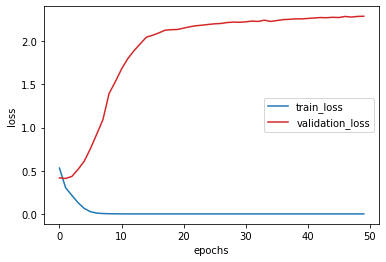

In [60]:
# let's plot training loss and vaidation loss
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x = range(50)
ax.plot(x, trained_model.history.get('loss'), color='tab:blue')
ax.plot(x, trained_model.history.get('val_loss'), color='tab:red')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'validation_loss'])

In [ ]:
# As we see from above plot, after few epohcs, even though the training loss continues to decrease and then flattens,
# but the validation loss continues to increase

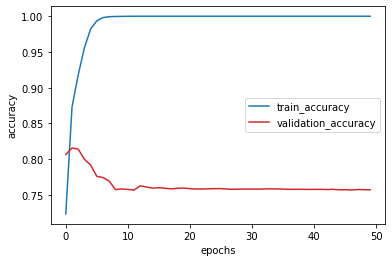

In [63]:
# let's plot training accuracy and vaidation accuracy
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x = range(50)
ax.plot(x, trained_model.history.get('accuracy'), color='tab:blue')
ax.plot(x, trained_model.history.get('val_accuracy'), color='tab:red')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_accuracy', 'validation_accuracy'])

In [65]:
# As we see from above plot, after few epohcs, even though the training accruracy continues to increase and then flattens,
# but the validation accuracy continues to decrease and then flattens out.
# this shows a classic case of overfitting 
# Note:  I have used 50 epochs just train in faster. May be we can try with a higher epoch to see if we get any improvenment in validation accuracy